In [32]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
df = pd.read_csv('KNN_DATA.csv')
df.head()

,Class,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.,Rating
0,HPC Fall 2015,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429,AA
1,ECPE127 Spring 16,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129,AA
2,ECPE 170 Spring 16,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727,BA
3,ECPE124 Fall 16,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714,AA
4,ECPE 170 Fall 16,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000,BA


In [34]:
x_test = pd.read_csv('testing.csv')
x_test.head()

,Knowledge,Enthusiasm,Organization,Preparedness,Ability to Explain Difficult Concepts,Speaking Ability,Approachability,Encourages Discussion,Effectiveness of Examples
0,2.766581,4.307034,3.055430,4.505494,3.305371,3.669063,3.634496,3.505480,4.168396
1,4.373000,3.796748,4.074100,4.250140,4.168232,4.019882,4.170892,4.253898,4.149039
2,4.463235,4.509837,4.681689,4.416587,4.592812,4.446238,4.572768,4.563939,4.500160
3,4.929048,4.592506,4.694749,4.625259,4.360719,4.635953,4.334659,4.347828,4.418522
4,4.500535,4.308903,4.602825,4.369495,4.526955,4.560551,4.475464,4.495241,4.358077


In [35]:
test = df['Rating'].unique()
test = np.append(test, 'A')

In [36]:
df['Rating'] = df['Rating'].map({'P':0,'BA' :1, 'A':2, 'AA' :3, 'E' :4}).astype(int) #mapping numbers
df.head()

,Class,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.,Rating
0,HPC Fall 2015,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429,3
1,ECPE127 Spring 16,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129,3
2,ECPE 170 Spring 16,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727,1
3,ECPE124 Fall 16,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714,3
4,ECPE 170 Fall 16,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000,1


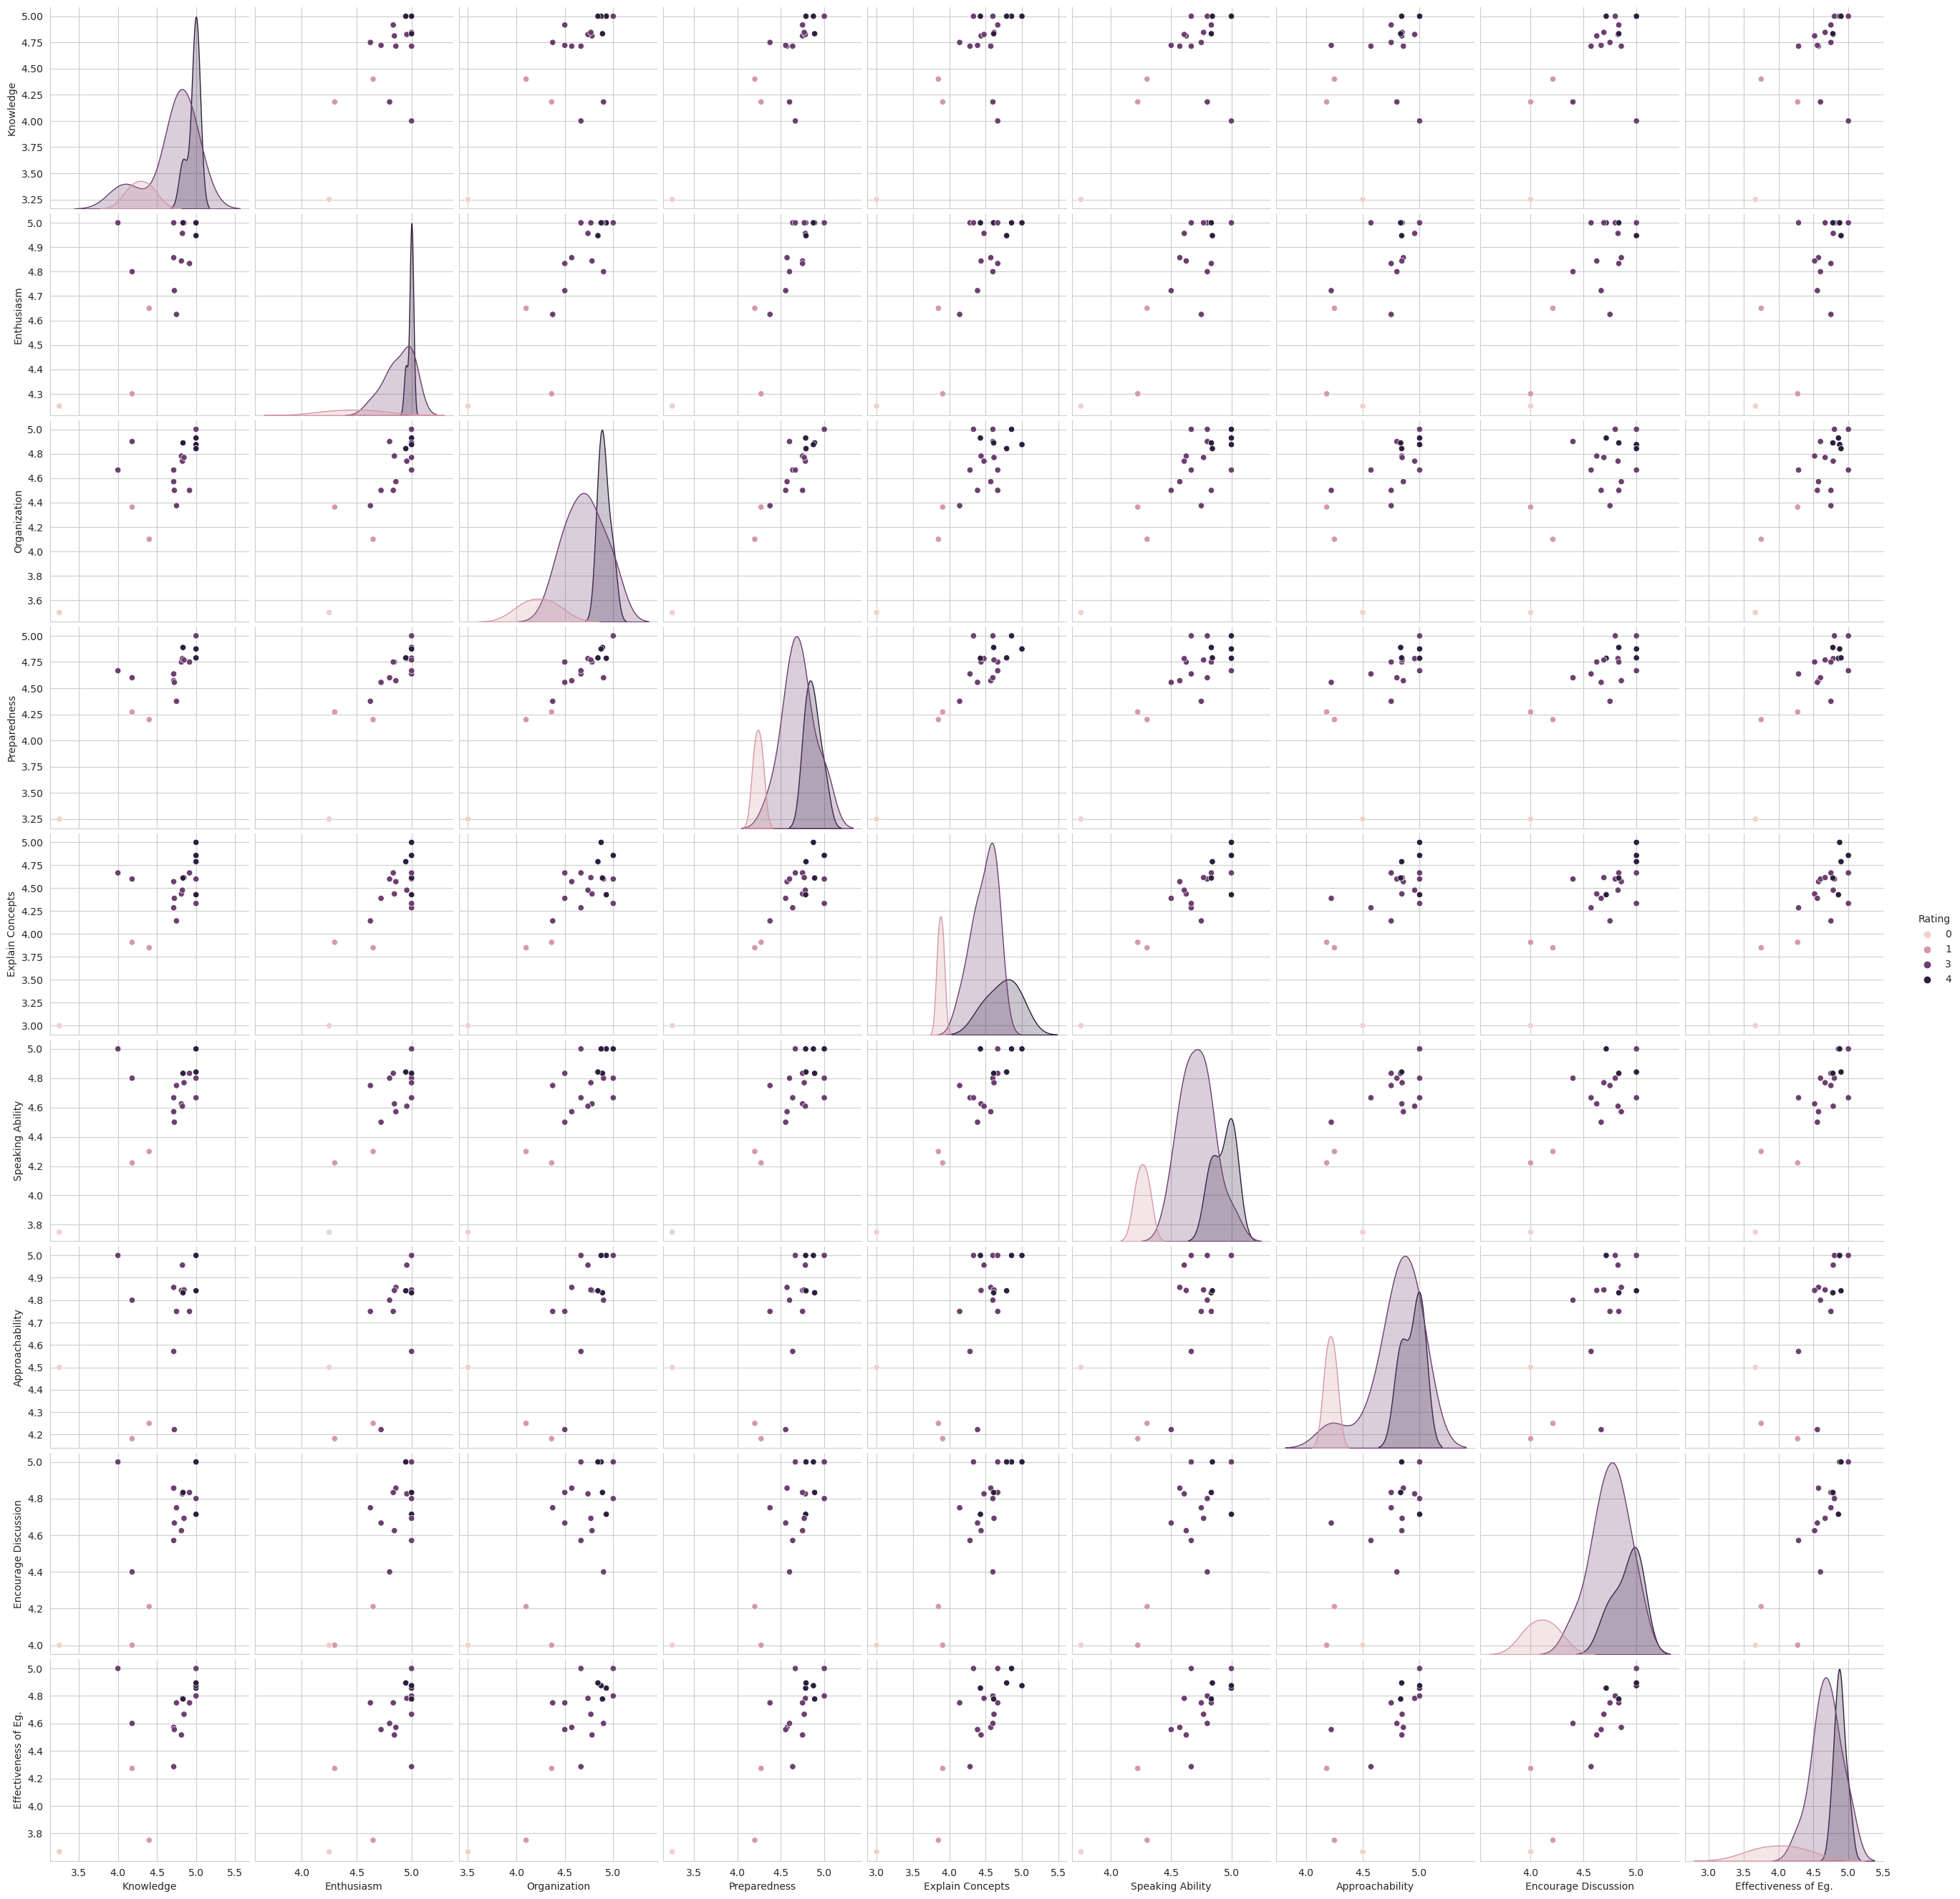

In [37]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='Rating', height=3);
plt.show()

In [38]:
x_data = df.drop(['Rating','Class'],axis=1)
y_data = df['Rating']
x_data

,Knowledge,Enthusiasm,Organization,Preparedness,Explain Concepts,Speaking Ability,Approachability,Encourage Discussion,Effectiveness of Eg.
0,4.714286,4.857143,4.571429,4.571429,4.571429,4.571429,4.857143,4.857143,4.571429
1,4.812500,4.843750,4.781250,4.750000,4.437500,4.625000,4.843750,4.625000,4.516129
2,4.181818,4.300000,4.363636,4.272727,3.909091,4.222222,4.181818,4.000000,4.272727
3,4.714286,5.000000,4.666667,4.636364,4.285714,4.666667,4.571429,4.571429,4.285714
4,4.400000,4.650000,4.100000,4.200000,3.850000,4.300000,4.250000,4.210526,3.750000
5,4.750000,4.625000,4.375000,4.375000,4.142857,4.750000,4.750000,4.750000,4.750000
6,4.826087,4.956522,4.739130,4.782609,4.478261,4.608696,4.956522,4.826087,4.782609
7,5.000000,5.000000,4.928571,4.785714,4.428571,5.000000,5.000000,4.714286,4.857143
8,3.250000,4.250000,3.500000,3.250000,3.000000,3.750000,4.500000,4.000000,3.666667
9,5.000000,5.000000,5.000000,5.000000,4.857143,5.000000,5.000000,5.000000,5.000000


In [40]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_data,y_data)
ypred=knn_clf.predict(x_data)

In [41]:
result = confusion_matrix(y_data, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_data, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_data,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[ 0  1  0  0]
 [ 0  0  2  0]
 [ 0  0 11  1]
 [ 0  0  2  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           3       0.73      0.92      0.81        12
           4       0.75      0.60      0.67         5

    accuracy                           0.70        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.63      0.70      0.66        20

Accuracy: 0.7


/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dirichlet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
